In [1]:
import pandas as pd
import numpy as np

In [2]:
df=pd.read_csv("Loan Delinquent Dataset.csv")

In [3]:
print(df)

          ID delinquent  Sdelinquent       term  gender   purpose  \
0          1        Yes            1  36 months  Female     House   
1          2         No            0  36 months  Female     House   
2          3        Yes            1  36 months  Female     House   
3          4        Yes            1  36 months  Female       Car   
4          5        Yes            1  36 months  Female     House   
...      ...        ...          ...        ...     ...       ...   
11543  11544         No            0  60 months    Male     other   
11544  11545        Yes            1  36 months    Male     House   
11545  11546         No            0  36 months  Female  Personal   
11546  11547        Yes            1  36 months  Female     House   
11547  11548        Yes            1  36 months    Male  Personal   

      home_ownership    age     FICO  
0           Mortgage    >25  300-500  
1               Rent  20-25     >500  
2               Rent    >25  300-500  
3           Mor

In [4]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler

# Preprocessing: Encoding categorical variables
categorical_columns = ['term', 'gender', 'purpose', 'home_ownership', 'age', 'FICO']
label_encoders = {col: LabelEncoder() for col in categorical_columns}
for col in categorical_columns:
    df[col] = label_encoders[col].fit_transform(df[col])


In [5]:
# Separating features and target variable
X = df.drop(columns=['ID', 'delinquent', 'Sdelinquent'])
y = df['Sdelinquent']


In [6]:
# Normalizing numerical features
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)


In [7]:
# Splitting data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, 
                                                    random_state=42)


In [9]:
# Verifying the shapes of the datasets
X_train.shape, X_test.shape, y_train.shape, y_test.shape


((9238, 6), (2310, 6), (9238,), (2310,))

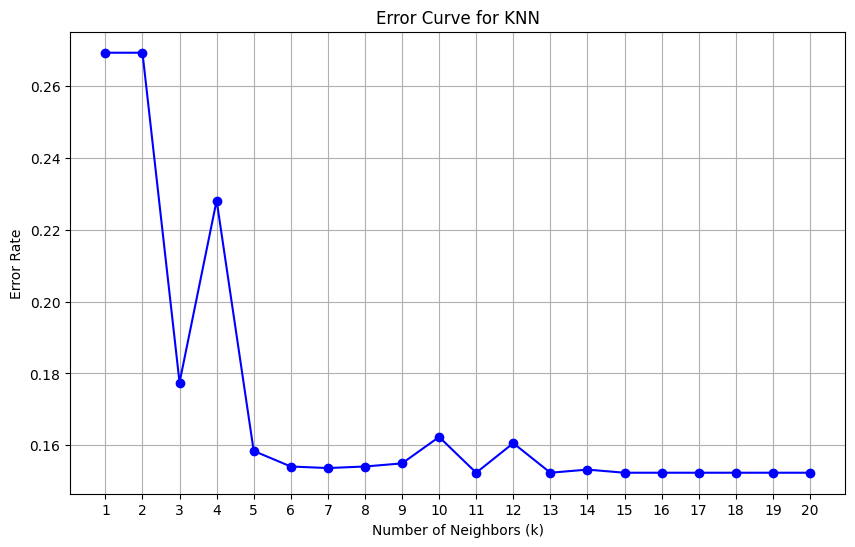

In [10]:
from sklearn.neighbors import KNeighborsClassifier,KNeighborsRegressor
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt

# Initialize lists to store k values and corresponding errors
k_values = range(1, 21) # [1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20]
errors = [] # create an empty list to store errors

# Train and evaluate the model for different values of k
for k in k_values:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, y_train)
    y_pred = knn.predict(X_test)
    error = 1 - accuracy_score(y_test, y_pred)
    errors.append(error)
    
# Plot the error curve
plt.figure(figsize=(10, 6))
plt.plot(k_values, errors, marker='o', linestyle='-', color='b')
plt.title("Error Curve for KNN")
plt.xlabel("Number of Neighbors (k)")
plt.ylabel("Error Rate")
plt.xticks(k_values)
plt.grid(True)
plt.show()


In [11]:
# Find the optimal k (minimum error)
optimal_k = k_values[errors.index(min(errors))]
optimal_k

11

In [12]:
# Train the KNN model with the optimal k
knn_optimal = KNeighborsClassifier(n_neighbors=optimal_k)
knn_optimal.fit(X_train, y_train)


,n_neighbors,11
,weights,'uniform'
,algorithm,'auto'
,leaf_size,30
,p,2
,metric,'minkowski'
,metric_params,None
,n_jobs,None


In [13]:
# Calculate performance metrics 
from sklearn.metrics import classification_report, confusion_matrix
# Predict on the train set
y_pred_optimal_train = knn_optimal.predict(X_train)

#Train Data
conf_matrix_train = confusion_matrix(y_train, y_pred_optimal_train)
class_report_train = classification_report(y_train, y_pred_optimal_train)
print(optimal_k)
print(conf_matrix_train)
print(class_report_train)

# Predict on the test set
y_pred_optimal_test = knn_optimal.predict(X_test)

# Test Data
conf_matrix_test = confusion_matrix(y_test, y_pred_optimal_test)
class_report_test = classification_report(y_test, y_pred_optimal_test)
print(optimal_k)
print(conf_matrix_test)
print(class_report_test)



11
[[2188  875]
 [ 545 5630]]
              precision    recall  f1-score   support

           0       0.80      0.71      0.76      3063
           1       0.87      0.91      0.89      6175

    accuracy                           0.85      9238
   macro avg       0.83      0.81      0.82      9238
weighted avg       0.84      0.85      0.84      9238

11
[[ 545  219]
 [ 133 1413]]
              precision    recall  f1-score   support

           0       0.80      0.71      0.76       764
           1       0.87      0.91      0.89      1546

    accuracy                           0.85      2310
   macro avg       0.83      0.81      0.82      2310
weighted avg       0.85      0.85      0.85      2310

